In [1]:
from hybridpy.learning import dynamicprogramming
from hybridpy.dataset import triploader
from hybridpy.models import batteries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

In [2]:
%matplotlib inline

In [21]:
# Supercapacitor - battery setup for all-electric vehicle
# Cost is current squared on the battery, integrated over time
# Control is battery power,
cc_cf = lambda control, supercap_power, duration_s: control*control*duration_s 
bat_controls = [0, 5000, 10000, 20000, 30000]
supercap = batteries.IdealBattery(max_energy_wh=100)

In [22]:
trip = triploader.load('/Users/astyler/projects/ChargeCarData/thor/thor20100226_0.csv')

In [23]:
v, q, p, d = dynamicprogramming.compute(trip=trip, controls=bat_controls, battery=supercap, cost_function=cc_cf, soc_states=50)

In [33]:
ice_controls = [0, 20000, 40000, 60000, 80000]
ice_cf = lambda control, battery_power, duration_s: control * duration
battery = batteries.QuadraticBattery()

In [20]:
v[0]

array([ 1882.68542207,  1882.31807513,  1881.95072819,  1881.58338125,
        1881.21603431,  1880.84868737,  1880.48134043,  1880.11399349,
        1879.74664655,  1879.37929962,  1879.01195268,  1878.64460574,
        1878.2772588 ,  1877.90991186,  1877.54256492,  1877.17521798,
        1876.80787104,  1876.44052411,  1876.07317717,  1875.70583023,
        1875.33848329,  1874.97113635,  1874.60378941,  1874.23644247,
        1873.86909553,  1873.5017486 ,  1873.13440166,  1872.76705472,
        1872.39970778,  1872.03236084,  1871.6650139 ,  1871.29766696,
        1870.93032003,  1870.56297311,  1870.19562622,  1869.82827944,
        1869.46093301,  1869.09358757,  1868.72624488,  1868.35890944,
        1867.99159228,  1867.62431933,  1867.25714965,  1866.89021535,
        1866.52381154,  1866.15862011,  1865.79639583,  1865.44239077,
        1865.11313133,  1864.84892387])

In [24]:
v[0]

array([ 1882.68542207,  1882.31807513,  1881.95072819,  1881.58338125,
        1881.21603431,  1880.84868737,  1880.48134043,  1880.11399349,
        1879.74664655,  1879.37929962,  1879.01195268,  1878.64460574,
        1878.2772588 ,  1877.90991186,  1877.54256492,  1877.17521798,
        1876.80787104,  1876.44052411,  1876.07317717,  1875.70583023,
        1875.33848329,  1874.97113635,  1874.60378941,  1874.23644247,
        1873.86909553,  1873.5017486 ,  1873.13440166,  1872.76705472,
        1872.39970778,  1872.03236084,  1871.6650139 ,  1871.29766696,
        1870.93032003,  1870.56297311,  1870.19562622,  1869.82827944,
        1869.46093301,  1869.09358757,  1868.72624488,  1868.35890944,
        1867.99159228,  1867.62431933,  1867.25714965,  1866.89021535,
        1866.52381154,  1866.15862011,  1865.79639583,  1865.44239077,
        1865.11313133,  1864.84892387])

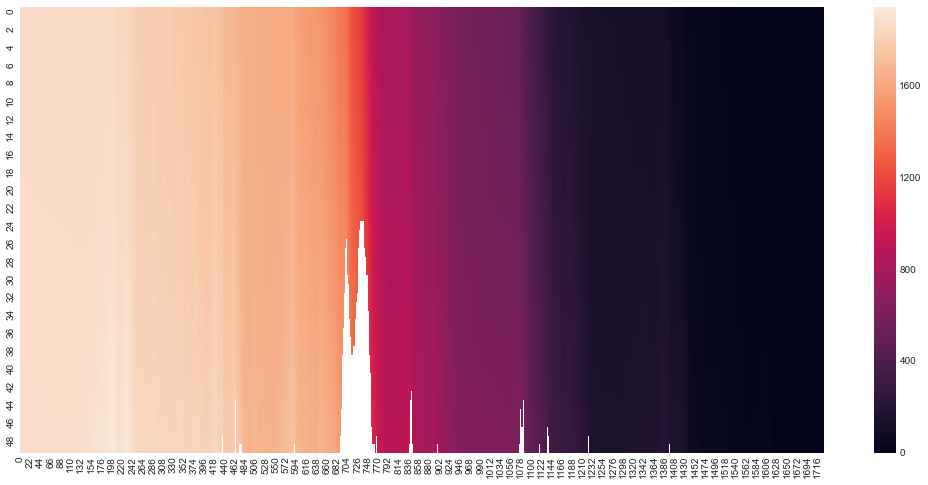

In [8]:
plt.figure(figsize=(18,8))
sns.heatmap(v.T[::-1], linewidths=0)#.imshow(v.T[::-1])#cmap='RdBu_r')

In [11]:
x = [1,2,3,4,5]

In [12]:
y = [10,20,30,np.nan, 50]

In [13]:
from scipy.interpolate import interp1d
f = interp1d(x,y, assume_sorted=True)

In [30]:
t=np.random.rand(*v.shape)

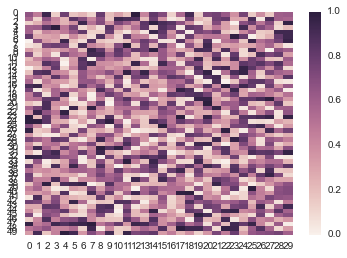

In [34]:
sns.heatmap(np.random.rand(50,30),linewidths=0)

In [16]:
((40000.0/3600)/50.)*100

22.22222222222222